<h1><center>Livrable modélisation</center></h1> 

<br>

<h2>Définition du problème</h2>

Pour ce projet, il nous a été demandé de proposer une solution au probléme de tournées de véhicules. Dans notre contexte, une entreprise veut investir dans l'optimisation de son service de livraison. Nous allons devoir definir une carte, qui sera composée de plusieurs villes à parcourir par les livreurs. L'objectif est de parcourir la carte en passant par chaque villes une seule fois sans possibilité d'y repasser durant la tournée. Le but étant de renvoyer le livreur à son point de départ, et de minimiser la distance de la tournée ainsi que la durée de livraison.

<br>

<h2>Contraintes choisies</h2>

Parmis les contraintes qui nous ont été proposée, voici celle que nous avons retenu :<br>
La fenêtre de temps de livraison pour chaque objet:
<ul>
    <li>
Interdiction de livrer hors de la fenêtre
    </li>
</ul>

<br>



<h2>La structure des données</h2>

Nous devons, dans un premier temps ecrire notre graphe de façon lisible pour notre programme. Pour cela, nous allons devoir choisir une structure de données.

Dans notre cas, j'ai choisi l'utilisation d'une matrice d'adjacence et une liste d'adjacence.

Nous allons donc voir comme choisir laquelle utiliser pour notre projet.

<h4>Listes d'adjacences</h4>

La liste d'adjacence d'un graphe non orienté, est la liste des voisins de chaque sommet. Celle d'un graphe orienté est typiquement, pour chaque sommet, la liste de nœuds à la tête de chaque arête ayant le sommet comme queue.

C'est une représentation relativement compacte lorsqu'il y a peu d'arêtes (graphe creux), puisque la liste globale contient 2m éléments, où m est le nombre d'arêtes.

Une représentation par liste d'adjacence d'un graphe associe, à chaque sommet du graphe, la collection de ses voisins, comme sommets ou comme arêtes. Il existe de nombreuses variations de ce principe de base, qui diffèrent par des détails dans la mise en œuvre de l'association entre les sommets et ces collections, et de l'implémentation de ces collections elles-mêmes, selon qu'elles comprennent, comme élément de base, les deux sommets des arêtes, ou les arêtes comme objet, ou seulement les sommets voisins, ou encore dans le choix des types d'objets utilisés pour représenter les sommets et la liste de tes.

uisque cette représentation par liste d'adjacence a des limites, essayons d'utiliser une autre structure : une matrice d'adjacence.

<h4>Matrices d'adjacences</h4>


Dans cette structure, on utilise une matrice carrée $m$ de taille $n\times n$ (avec $n$ le nombre de sommets) dans laquelle une arête $a~— b$ est représentée par la valeur $1$ dans l'élément $m_{ab}$. Pour les sommets non reliés entre eux, on met la valeur $0$.

Est-elle meilleure que la liste d'adjacence ?

Elle n'est ni meilleure, ni moins bonne. Certaines opérations sont plus faciles à réaliser sur cette structure, et inversement certaines sont plus faciles à effectuer sur la liste d'adjacence.

Notamment, la matrice est plus efficace pour accéder aux prédécesseurs d'un voisin (c'est aussi rapide qu'accéder à ses successeurs), vérifier l'existence d'une arête, et modifier le graphe.
    
En revanche, construire une liste de voisins d'un sommet est plus lourd, puisqu'il faut parcourir toute la ligne concernée de la matrice, ce qui implique donc un traitement en $n$ opérations ($n$ étant le nombre de sommets).

<h3>Matrice d'adjacence</h3>


In [46]:
from collections import deque
import copy
import time
from matplotlib import pyplot as plt

matrix_zone_A = [
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], 
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0], 
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0], 
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], 
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], 
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0], 
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], 
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], 
]

Maintenant, nous devons calculer les degres de chaque sommet pour regarder si notre graphe valide le théorème du cycle eulerien.

In [47]:
def degreSommetGrapheMatrice(matrice:list[list[int]], sommet:int):
    degre = sum(matrice[sommet])
    return degre

Nous pouvons maintenant regarder si notre graphe est un cycle eulérien.

In [48]:
def existeCycleEulerien(matrice):                                     
    for sommet in range(len(matrice)):
        return (True,False)[degreSommetGrapheMatrice(matrice, sommet) % 2 !=0]
        
if (existeCycleEulerien(matrix_zone_A)):
    print ("Le graphe avec la matrice de la Zone A est eulérien")
else:
    print ("Le graphe avec la matrice de la Zone A n'est pas eulérien")


Le graphe avec la matrice de la Zone A est eulérien


Avec un graphe qui est eulérien, nous pouvons parcourir ce graphe avec l'algorithme d'euler.


J'ai une fonctions qui respect comme structure de données d'une matrice.

In [49]:
def cycleEulerienMatrice(matrice):
    # la matrice est passée par référence, on fait donc une copie de la matrice pour éviter d'écraser ses données.
    # comme il faut aussi copier les listes internes, on fait une _copie profonde_
    matrice = copy.deepcopy(matrice)
    n = len(matrice) 

    cycle = deque() # cycle est le cycle à construire
    stack = deque() # stack est la pile de sommets à traiter
    cur = 0         # cur est le sommet courant. on commence avec le premier sommet de la matrice
    # on boucle tant qu'il y a des sommets à traiter dans la pile
    # ou que le sommet courant possède au moins 1 voisin non traité
    while(len(stack) > 0 or degreSommetGrapheMatrice(matrice, cur) != 0): 
          
        # si le sommet courant ne possède aucun voisin, on l'ajoute au cycle
        # et on revient au sommet ajouté précédemment dans la pile (backtracking) 
        # qui devient le nouveau sommet courant
        if degreSommetGrapheMatrice(matrice, cur) == 0:
            cycle.append(cur)
            cur = stack[-1]
            stack.pop()
        #À COMPLÉTER
  
        # si il a au moins 1 voisin, on l'ajoute à la stack pour y revenir plus tard (backtracking)
        # on retire l'arête qu'il partage avec ce voisin, qui devient le sommet courant
        else: 
            for i in range(n):                              
                #À COMPLÉTER
                if matrice[cur][i] == 1:
                    stack.append(cur)
                    matrice[cur][i]=0
                    matrice[i][cur]=0
                    cur = i
                    break                                       
    return cycle;

In [50]:
print("### Calcul d'un cycle Eulérien,avec une matrice, du graphe de la Zone A ###")
cycle = cycleEulerienMatrice(matrix_zone_A)
for sommet in cycle: 
    print(sommet+1, "-> ", end = '') 
print(cycle[0]+1)

### Calcul d'un cycle Eulérien,avec une matrice, du graphe de la Zone A ###
1 -> 4 -> 9 -> 8 -> 7 -> 10 -> 11 -> 6 -> 5 -> 8 -> 3 -> 4 -> 5 -> 2 -> 1


Ensuite on réalise une fonction de générations de matrice aléatoire : 

In [51]:
import numpy as np
def grapheEulerienMatrice(taille:int,pbOne:float,pbTwo:float):
    # on génère une matrice aléatoire booléenne (pour pouvoir faire des `ou`)
    # on renvoie la matrice de booléens convertie en matrice d'entiers
    b = np.random.choice((True, False), size=(taille,taille), p=[pbOne, pbTwo])
    
    # on fait le `ou` logique de la matrice et de sa transposée
    b_symm = np.logical_or(b, b.T)
    
    # on renvoie la matrice de booléens convertie en matrice d'entiers
    return b_symm.astype(int)             

Maintenant on étudie le temps d'éxécution en fonction de la taille d'un graphe pour avoir un avis sur la structure de données qu'il faut utiliser avec cette algorithme en le comparant par la suite aux listes.

IntProgress(value=0, layout=Layout(width='100%'), max=950)

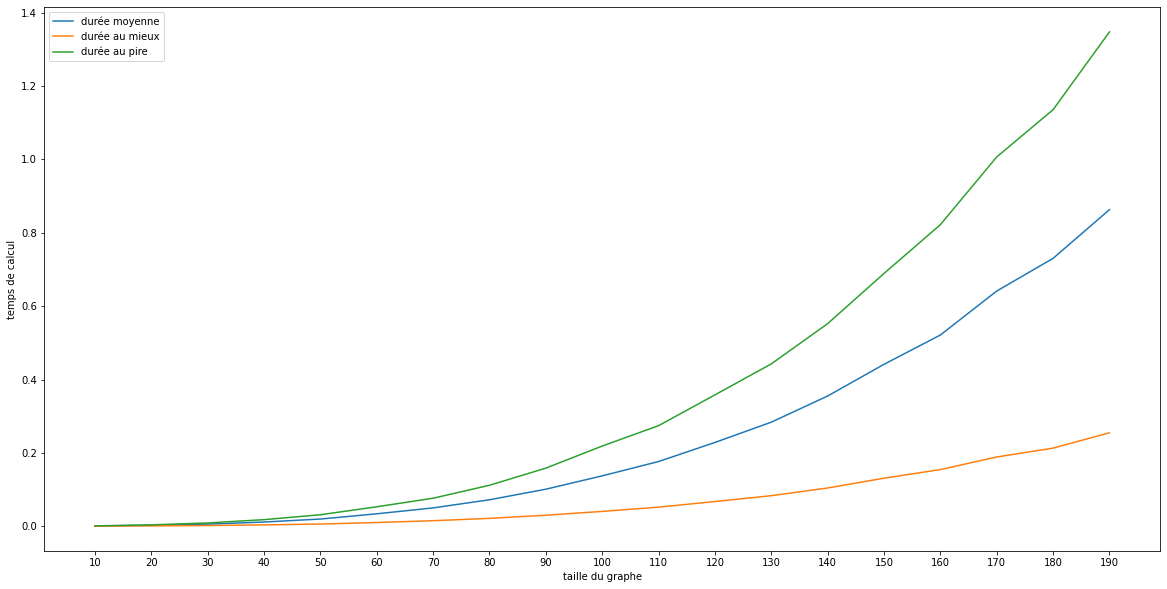

In [52]:
from ipywidgets import IntProgress
from IPython.display import display
import time
from matplotlib import pyplot as plt


nb_iteration = 50
taille_min   = 10
taille_max   = 200
taille_step  = 10

durees_moy   = []
durees_mieux = []
durees_pire  = []

# on affiche la barre de progression
nb_tests = ((taille_max - taille_min) / taille_step) * nb_iteration
bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
display(bar)

for taille in range(10, 200, 10):
    duree_mieux = 0.0 # oui, Python permet de manipuler les valeur infinies
    duree_pire  = 0.0
    duree_moy   = 0.0
    duree_moy_list = 0.0
    duree_pire_list = 0.0
    duree_mieux_list = 0.0
    
    for i in range(nb_iteration):
        start = time.time()
        cycleEulerienMatrice(grapheEulerienMatrice(taille,0.4, 0.6))
        stop = time.time()
        duree_moy += stop-start
        
        start = time.time()
        cycleEulerienMatrice(grapheEulerienMatrice(taille,1,0))
        stop = time.time()
        duree_pire +=  stop-start
    
        start = time.time()
        cycleEulerienMatrice(grapheEulerienMatrice(taille,0.1, 0.9))
        stop = time.time()
        duree_mieux += stop-start
        
        bar.value += 1 
    # on met à jour la barre de progression
    # on met à jour les listes des temps d'exécution
    durees_moy.append(duree_moy/nb_iteration)
    durees_mieux.append(duree_mieux/nb_iteration)
    durees_pire.append(duree_pire/nb_iteration)
# on cache la barre de progression
bar.close()

# on règle l'affichage des courbes
tailles = [x for x in range(10, 200, 10)]
plt.figure(figsize=(20,10))

plt.xlabel('taille du graphe')
plt.xticks(ticks=tailles) # valeurs affichées sur l'axe X
plt.ylabel('temps de calcul')

# on charge les données
plt.plot(tailles, durees_moy,   label='durée moyenne')
plt.plot(tailles, durees_mieux, label='durée au mieux')
plt.plot(tailles, durees_pire,  label='durée au pire')

# on affiche
plt.legend()
plt.show()

<h3>Matrice d'adjacence</h3>

Nous allons donc refaire la même chose mais avec une stucture différente comme une liste d'adjacence.

In [53]:
liste_succ_zone_A = {
    1 : [2,4],
    2 : [1,5],
    3 : [4,8],
    4 : [1,3,5,9],
    5 : [2,4,6,8],
    6 : [5,11],
    7 : [8,10],
    8 : [3,5,7,9],
    9 : [4,8],
    10: [7,11],
    11: [6,10]
}

Maintenant comme avant, nous devons calculer les degres de chaque sommet pour regarder si notre graphe valide le théorème du cycle eulerien.

In [54]:
def degreSommetGrapheDictonary(dictionary:dict[int,list[int]], sommet:int):
    degre = len(dictionary[sommet])
    return degre

Nous pouvons maintenant regarder si notre graphe est un cycle eulérien.

In [55]:
def existeCycleEulerienDictionary(liste_adjacente):                                     
    for sommet in liste_adjacente:
        return (True,False)[degreSommetGrapheDictonary(liste_adjacente, sommet) % 2 !=0]


if (existeCycleEulerienDictionary(liste_succ_zone_A)):
    print ("Le graphe avec la liste de la Zone A est eulérien")
else:
    print ("Le graphe avec la liste de la Zone A n'est pas eulérien")

Le graphe avec la liste de la Zone A est eulérien


Comme avant avec un graphe qui est eulérien, nous pouvons parcourir ce graphe avec l'algorithme d'euler. 

On a donc une autre fonctions qui respect la structure de données d'une liste.

In [56]:
def cycleEulerienListe(liste_adjacente):
    # la liste adjacente est passée par référence, on fait donc une copie de la liste pour éviter d'écraser ses données.
    # comme il faut aussi copier les listes internes, on fait une _copie profonde_
    liste = copy.deepcopy(liste_adjacente)
    n = len(liste_adjacente) 

    cycle = deque() # cycle est le cycle à construire
    stack = deque() # stack est la pile de sommets à traiter
    cur = 1       # cur est le sommet courant. on commence avec le premier sommet de la liste
    # on boucle tant qu'il y a des sommets à traiter dans la pile
    # ou que le sommet courant possède au moins 1 voisin non traité
    while(len(stack) > 0 or degreSommetGrapheDictonary(liste, cur) != 0): 
          
        # si le sommet courant ne possède aucun voisin, on l'ajoute au cycle
        # et on revient au sommet ajouté précédemment dans la pile (backtracking) 
        # qui devient le nouveau sommet courant
        if degreSommetGrapheDictonary(liste, cur) == 0:
            cycle.append(cur)
            cur = stack[-1]
            stack.pop()
  
        # si il a au moins 1 voisin, on l'ajoute à la stack pour y revenir plus tard (backtracking)
        # on retire l'arête qu'il partage avec ce voisin, qui devient le sommet courant
        else: 
            if len(liste[cur]) > 0:
                stack.append(cur)
                Firstvalue = liste[cur][0]
                liste[cur].remove(Firstvalue)
                liste[Firstvalue].remove(cur)
                cur = Firstvalue                                  
    return cycle;

In [57]:
print("### Calcul d'un cycle Eulérien,avec une liste, du graphe de la Zone A ###")
cycle = cycleEulerienListe(liste_succ_zone_A)
for sommet in cycle: 
    print(sommet, "-> ", end = '') 
print(cycle[0])

### Calcul d'un cycle Eulérien,avec une liste, du graphe de la Zone A ###
1 -> 4 -> 9 -> 8 -> 7 -> 10 -> 11 -> 6 -> 5 -> 8 -> 3 -> 4 -> 5 -> 2 -> 1


Ensuite on réalise la fonction de générations de liste aléatoire : 

In [58]:
from itertools import product, combinations
import random
def random_graph_liste(n, p, *, directed=False):
    nodes = range(n)
    adj_list = [[] for i in nodes]
    adj_dic ={}
    possible_edges = product(nodes, repeat=2) if directed else combinations(nodes, 2)
    for u, v in possible_edges:
        if random.random() < p:
            adj_list[u].append(v+1)
            if not directed:
                adj_list[v].append(u+1)
    for i in range(len(adj_list)):
        adj_dic[i+1]=adj_list[i]
    return adj_dic

Maintenant on étudie le temps d'éxécution en fonction de la taille d'un graphe pour avoir un avis sur la structure de données qu'il faut utiliser avec cette algorithme en le comparant aux aux matrices vue juste avant.

IntProgress(value=0, layout=Layout(width='100%'), max=950)

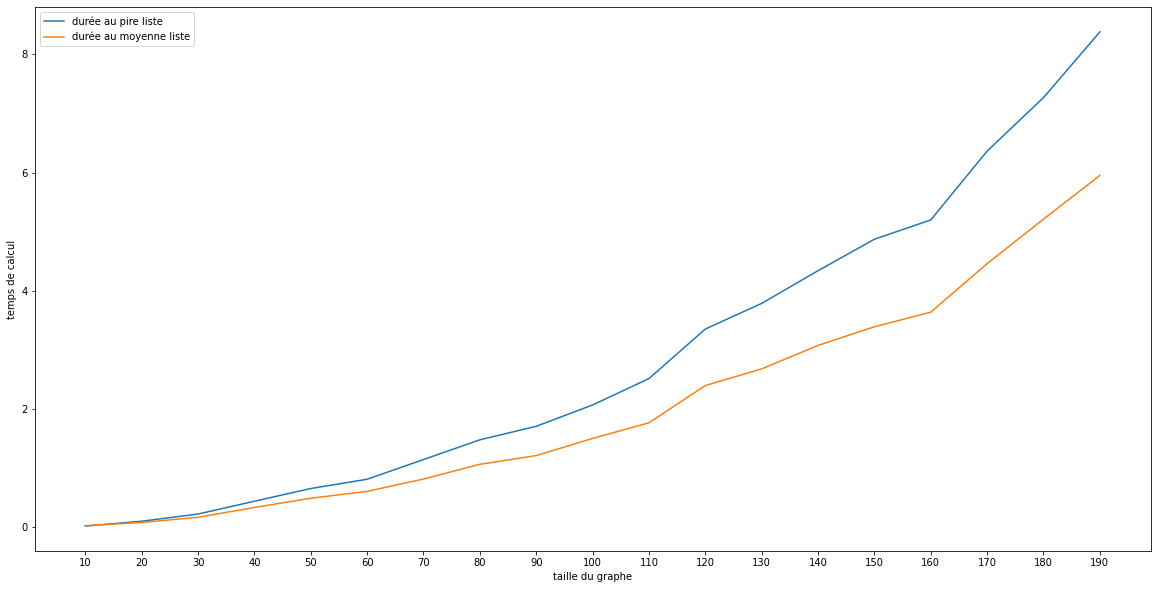

In [59]:
from ipywidgets import IntProgress
from IPython.display import display
import time
from matplotlib import pyplot as plt


nb_iteration = 50
taille_min   = 10
taille_max   = 200
taille_step  = 10

durees_moy_list = []
durees_pire_list = []

# on affiche la barre de progression
nb_tests = ((taille_max - taille_min) / taille_step) * nb_iteration
bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
display(bar)

for taille in range(10, 200, 10):
    duree_moy_list = 0.0
    duree_pire_list = 0.0
    
    for i in range(nb_iteration):
        start = time.time()
        cycleEulerienListe(random_graph_liste(taille,0.7))
        stop = time.time()
        duree_moy_list += stop-start
        
        start = time.time()
        cycleEulerienListe(random_graph_liste(taille,1))
        stop = time.time()
        duree_pire_list += stop-start
        bar.value += 1 
    # on met à jour la barre de progression
    # on met à jour les listes des temps d'exécution
    durees_moy_list.append(duree_moy_list)
    durees_pire_list.append(duree_pire_list)
# on cache la barre de progression
bar.close()

# on règle l'affichage des courbes
tailles = [x for x in range(10, 200, 10)]
plt.figure(figsize=(20,10))

plt.xlabel('taille du graphe')
plt.xticks(ticks=tailles) # valeurs affichées sur l'axe X
plt.ylabel('temps de calcul')

# on charge les données
plt.plot(tailles, durees_pire_list,  label='durée au pire liste')
plt.plot(tailles, durees_moy_list,  label='durée au moyenne liste')


# on affiche
plt.legend()
plt.show()

<h3>Comparaison du temps de calcul en fonction de la taille du graphe et de la stucture utiliser (matrice d'adjacence, liste d'adjacence).</h3>

Nous pouvons enfin comparer les deux structures de données en un seul schéma.

IntProgress(value=0, layout=Layout(width='100%'), max=950)

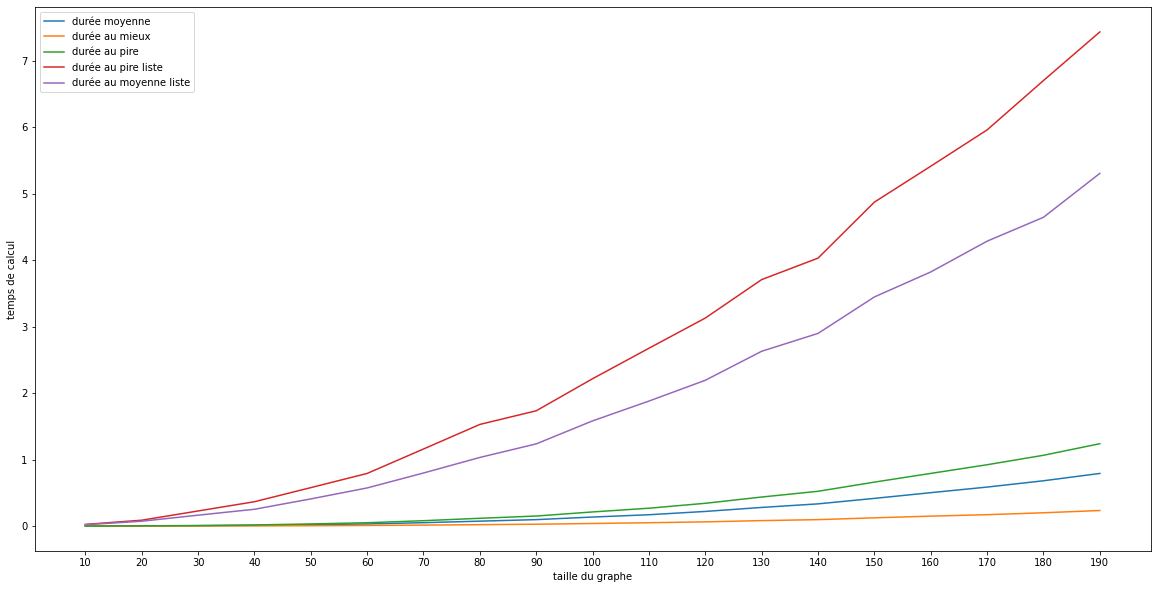

In [60]:
from ipywidgets import IntProgress
from IPython.display import display
import time
from matplotlib import pyplot as plt


nb_iteration = 50
taille_min   = 10
taille_max   = 200
taille_step  = 10

durees_moy   = []
durees_mieux = []
durees_pire  = []
durees_moy_list = []
durees_pire_list = []
durees_mieux_list = []

# on affiche la barre de progression
nb_tests = ((taille_max - taille_min) / taille_step) * nb_iteration
bar = IntProgress(min=0, max=nb_tests, layout={"width" : "100%"})
display(bar)

for taille in range(10, 200, 10):
    duree_mieux = 0.0 # oui, Python permet de manipuler les valeur infinies
    duree_pire  = 0.0
    duree_moy   = 0.0
    duree_moy_list = 0.0
    duree_pire_list = 0.0
    duree_mieux_list = 0.0
    
    for i in range(nb_iteration):
        #À COMPLÉTER
        start = time.time()
        cycleEulerienListe(random_graph_liste(taille,0.7))
        stop = time.time()
        duree_moy_list += stop-start
        
        start = time.time()
        cycleEulerienListe(random_graph_liste(taille,1))
        stop = time.time()
        duree_pire_list += stop-start
        
        
        start = time.time()
        cycleEulerienMatrice(grapheEulerienMatrice(taille,0.4, 0.6))
        stop = time.time()
        duree_moy += stop-start
        
        start = time.time()
        cycleEulerienMatrice(grapheEulerienMatrice(taille,1,0))
        stop = time.time()
        duree_pire +=  stop-start
    
        start = time.time()
        cycleEulerienMatrice(grapheEulerienMatrice(taille,0.1, 0.9))
        stop = time.time()
        duree_mieux += stop-start
        
        bar.value += 1 
    # on met à jour la barre de progression
    # on met à jour les listes des temps d'exécution
    durees_moy.append(duree_moy/nb_iteration)
    durees_mieux.append(duree_mieux/nb_iteration)
    durees_pire.append(duree_pire/nb_iteration)
    durees_moy_list.append(duree_moy_list)
    durees_pire_list.append(duree_pire_list)
# on cache la barre de progression
bar.close()

# on règle l'affichage des courbes
tailles = [x for x in range(10, 200, 10)]
plt.figure(figsize=(20,10))

plt.xlabel('taille du graphe')
plt.xticks(ticks=tailles) # valeurs affichées sur l'axe X
plt.ylabel('temps de calcul')

# on charge les données
plt.plot(tailles, durees_moy,   label='durée moyenne')
plt.plot(tailles, durees_mieux, label='durée au mieux')
plt.plot(tailles, durees_pire,  label='durée au pire')
plt.plot(tailles, durees_pire_list,  label='durée au pire liste')
plt.plot(tailles, durees_moy_list,  label='durée au moyenne liste')


# on affiche
plt.legend()
plt.show()

On remarque donc que pour les matrices d'adjacences les temps de calculs en fonction de la taille du graphe est en moyenne plus rapide que les listes d'adjacences pour cette algorithme nous devons donc re utiliser cette méthode sur notre algorithme du projet.


<br>

<h2>Le problème de décision</h2>


<h3>Définition du problème de decision</h3>

Après la structuration des données, nous devons également appliquer ce qu’on appelle un problème de décision, qui est une question mathématique dont la réponse est soit « oui », soit « non » sur un ensemble infini d’entrées.

Ces entrées peuvent être des nombres naturels, ou encore des valeurs d’un autre type, comme des chaînes binaires ou des chaînes sur un autre alphabet.
Le sous-ensemble de chaînes pour lequel le problème renvoie « oui » est un langage formel, et les problèmes de décision sont souvent définis comme des langages formels.

Les problèmes de décision peuvent être classés selon la réductibilité à plusieurs et liés à des réductions réalisables comme les réductions en temps polynomial.
Un problème de décision P est dit complet pour un ensemble de problèmes de décision S si P est membre de S et que tout problème de S peut être réduit à P.

Ainsi, les problèmes de décision complets sont utilisés dans la complexité computationnelle pour caractériser les classes de complexité des problèmes de décision.

Comme expliqué précédemment, ce problème est défini par des données et une question.
Pour pouvoir y répondre, on doit d’abord extraire toute l’information apportée par l’énoncé et préparer les problèmes selon les besoins de la méthode résolutif.

Ici, les données sont essentiellement tournées niveau graphe. On a donc : 
<ul>
    <li>
        Données :<br>
        Un graphe G pondéré, non orienté, complet et connexe<br>
        Les arrêtes seront les routes pondérées par un ensemble de plages horaires de livraison.<br>
        Notre graphe represente le sous ensemble de villes ou notre itiniraire de livraison.<br>
        Le trafic varie sur les arrêtes selon la plage horaire.<br>
    </li>
    <li>
        Question : <br>
        Existe-t-il un chemin complet qui relie chaque villes une fois entre elles en minimisant la distance totale de la tournée ?
    </li>
</ul>

<br>

<h2>Le problème d'optimisation</h2>

Contrairement aux problèmes de décision auxquels une seule réponse est correcte pour chaque entrée, les problèmes d’optimisation, eux, visent à trouver la meilleure réponse à une entrée particulière. 
On a :<br> 
•	Données : Un graphe G pondéré, non orienté, complet et connexe<br>
•	Question : Quel est le plus petit chemin par lequel chaque villes sera accédée une fois avant de retourner au point de départ ?<br>

Il existe des techniques standard pour transformer les problèmes de fonction et d'optimisation en problèmes de décision.
Par exemple, dans le problème du voyageur de commerce, le problème d'optimisation est de produire une tournée avec un poids minimal.
Le problème de décision associé est : pour chaque N, décider si le graphe a un tour de poids inférieur à N.
En répondant à plusieurs reprises au problème de décision, il est possible de trouver le poids minimal d'un tour.


<br>



<h2>Preuve de la NP-Complétude de notre problème</h2>

Tout d'abord, pourquoi chercher à prouver que notre problème de décision est NP-Complet ? Lorsque l'on ne connait pas d'algorithme déterministe qui nous permet de trouver une solution exacte et en un temps polynomial et optimal (rapidement), on parle de problème NP-complet, plus exactement, NP-Difficile en ce qui concerne le problème d'optimisation, ce qui est le cas dans ce projet.
En effet, étudier un problème que l'on croit difficile parce qu'on en est persuadé est différent qu'étudier un problème qui est formellement considéré comme étant difficile.
<br>

Pour prouver que notre problème de décision est NP-Complet, il faut avant tout prouver qu'il existe un certificat vérifiant la validité d'une solution à ce problème en un temps polynomial.
Plus précisement, un certificat est une information que l'on ajoute à une donnée du problème, pour certifier que la réponse au problème pour cette donnée soit « oui » ou « non ».
<br>

Considérons un graphe G pondéré, complet, connexe de "n" sommets reliés par "k" arrêtes de poids "p". Soit l'ensemble "D" les plages horaires contenue dans [8h00; 20h00].Une plage horaire est de 2 heures.
Notre certificat est un algorithme qui parcourra G en fonction de p et D pour déterminer si telle plage horaire est la mieux adaptée pour passer par telle route.<br>
Donc pour un algorithme de certificat noté R :  R<sub>cert</sub> (G, D) => valide / invalide<br>
De ce fait, notre algorithme résoudra le problème en temps polynomial (O(n²)) puisqu’il aura des boucles imbriquées qui parcouront plusieurs tableaux comme le montre le pseudo code suivant:<br>

<strong>Algorithme de certificat</strong><br>
Début
<div style="border-left: 1px solid black;padding-left:25px;margin:5px;">
    Créer une matrice d'adjacence remplie<br>
    Créer une liste des plages horaires disponibles<br>
    Créer un dictionnaire<br>
    Initialisation du poids maximum<br>
    <br>
    <strong>Pour</strong> i variant dans la matrice:<br>
        <div style="border-left: 1px solid black;padding-left:25px;margin:5px;">
            Ajouter pour chaque ligne du dictionnaire l'arrête courante de la matrice à une plage horaire<br>
        </div>
    <strong>Pour</strong> j,m variant dans le dictionnaire:<br>
        <div style="border-left: 1px solid black;padding-left:25px;margin:5px;">
            <strong>Si</strong> la valeur de j est inférieure au poids maximum fixé et m figure dans la liste des plages horaires:<br>
                <div style="border-left: 1px solid black;padding-left:25px;margin:5px;">
                Ne rien Faire<br>
                </div>
            <strong>Sinon</strong>:<br>
                <div style="border-left: 1px solid black;padding-left:25px;margin:5px;">
                    Afficher "les données d'entrées ne sont pas valide"<br>
                    Fin<br>
                </div>
        </div>
    Afficher "les données d'entrées sont valide"<br>
    Fin<br>
</div>
Fin<br>

Comme cet algorithme peut résoudre le problème en temps polynomial, on peut en déduire qu’il fait parti de NP.<br>

Maintenant que l'on sait que notre problème est dans NP, il faut démontrer qu'il est NP-Complet et pour ce faire, on doit s'appuyer sur un problème que l'on sait déja NP-Complet. Le problème NP-Complet sur lequel on va s'appuyer est le problème du voyageur de commerce (TSP en anglais) puisqu'il énonce clairement la problématique de notre étude.<br>
Mais comment sait-on que le problème du voyageur est NP-Complet ? Il suffit de le rapprocher à un problème tout aussi difficile qui est NP-Complet et d'en transformer les instances du voyageur de commerce en instances de ce problème. Le problème du cycle hamiltonien est le problème adéquat puisqu'il est une généralisation du TSP.<br>

Donc un certificat du TSP verifierait la validité d'une solution en prenant en entrée un graphe G complet et pondéré avec comme condition la présence d'un cycle qui passe par tout les sommets du graphe, dont la somme du poids des arrêtes est inférieure à un nombre k : Cert<sub>TSP</sub> (G, k) => valide / invalide<br>
Le temps de validation se fait en O(n) car pour un graphe de n arrêtes, il effectue n vérifications. 
À ce stade, on sait que le TSP est dans NP. Alors :<br>
<ul>
    <li>
        Une instance du TSP est un graphe complet et pondéré tel que G=(V,A, w) avec V un ensemble de sommets, A un ensemble d'arêtes et w une fonction de coût sur les arrêtes. 
    </li>
    <li>
        Une instance du problème du cycle hamiltonien est un graphe complet tel que que G=(V,A) avec V un ensemble de sommets, A un ensemble d'arêtes.
    </li> 
</ul>
Une transformation d'une instance du TSP en une instance du problème du cycle hamiltonien reviendrait à considérer les sommets du graphe comme étant des villes et les arrêtes les routes avec le poids comme disatance le tout en un temps polynomial. De ce fait, une réponse au problème de decision du cycle hamiltonien résulterait en la même réponse pour le problème du TSP comme le montre le schéma ci dessous:<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; O(<sub>n²</sub>)<br>
I<sub>TSP</sub> $\rightarrow$ I<sub>Ch</sub><br>
&nbsp;&nbsp;$\downarrow$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\downarrow$<br>
Oui $\rightarrow$ Oui
<br>

Etant donné que le TSP est dans NP et qu'il est NP-Complet, on peut en déduire qu'il est lui aussi NP-Difficile.<br>
À présent, il ne reste plus qu'à répéter la procédure pour prouver que notre problème est lui aussi NP-Complet. Alors : <br>
<ul>
    <li>
        Une instance du TSP est un graphe complet et pondéré. 
    </li>
    <li>
        Une instance du problème de notre problème est un graphe complet, connexe et pondéré.
    </li> 
</ul>
Une transformation d'une instance de notre problème en une instance du TSP reviendrait à considérer les sommets du graphe comme étant des villes et les arrêtes les routes avec le poids comme disatance le tout en un temps polynomial. De ce fait, une réponse au problème de decision du TSP résulterait en la même réponse pour notre problème comme le montre le schéma ci dessous:<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; O(<sub>n²</sub>)<br>
I<sub>prob</sub> $\rightarrow$ I<sub>TSP</sub><br>
&nbsp;&nbsp;$\downarrow$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\downarrow$<br>
Oui $\rightarrow$ Oui
<br>

Comme notre problème est dans NP et qu'il est NP-Complet, on peut en déduire qu'il est lui aussi NP-Difficile.<br>
Maintenant il ne manque plus qu'à trouver et mettre en place un algorithme qui résout le problème de façon optimale.

<h2>Conclusion</h2>

Dans notre cas, nous savons qu'il n'y a pas une seule et unique méthode de résolution possible. En effet, selon le contexte, et donc selon les contraintes, nous pouvons partir sur plusieurs types d'algorithme afin d'aboutir à une solution plus ou moins optimale.